In [69]:
import pandas as pd
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [50]:
df = pd.read_csv('housing.csv')
df_filt = df[df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]
df_filt.median_house_value = np.log1p(df_filt.median_house_value.values)
df_filt = df_filt.fillna(0)

C:\Users\p114349\AppData\Local\Temp\ipykernel_25344\1564453506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt.median_house_value = np.log1p(df_filt.median_house_value.values)


In [51]:
df_train_full, df_test = train_test_split(df_filt, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [52]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']

In [53]:
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train.shape

(9411, 10)

# Question 1

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text


In [45]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [46]:
dt

DecisionTreeRegressor(max_depth=1)

In [47]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



# Question 2

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [59]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [64]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

mean_squared_error(y_val, y_pred, squared = False)

0.24459962783255346

# Question 3

In [67]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared = False)
    
    scores.append((n, rmse))

In [68]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

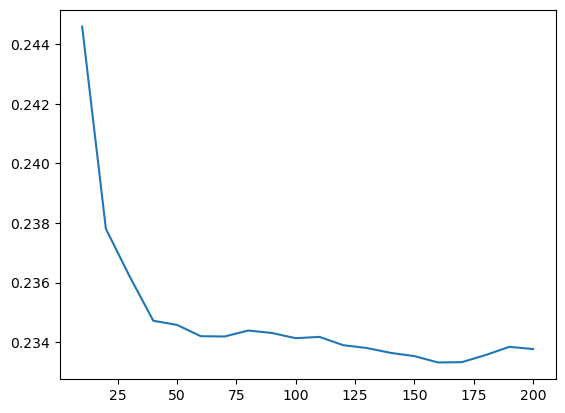

In [70]:
plt.plot(df_scores.n_estimators, df_scores.rmse)


# Question 4

In [73]:
scores = []

for depth in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        dt = RandomForestRegressor(max_depth=depth, n_estimators=n,random_state=1)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared = False)
        
        scores.append((depth, n, rmse))

In [74]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

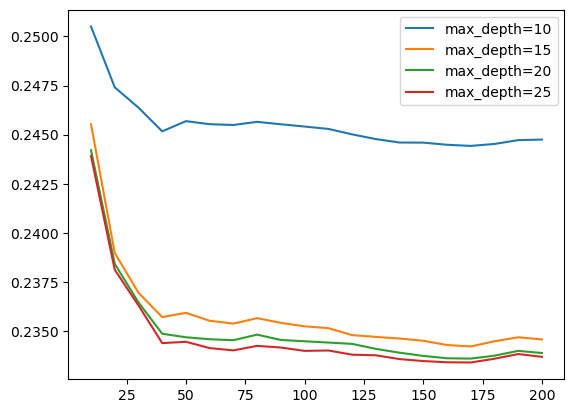

In [75]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()